# Comparing the top five leagues of european football from 2010 - 2020

In [1]:
# All data is credited to Jehan Bathena on https://www.kaggle.com/datasets/jehanbhathena/big-5-european-football-leagues-stats

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

%matplotlib notebook

In [3]:
df = pd.read_csv('Data/clubs_in_leagues.csv')
df.head()

,competition,season,rank,squad,games,wins,draws,losses,goals_for,goals_against,...,cards_red,shots_on_target_against,saves,clean_sheets,shots_on_target,games_starts,games_complete,games_subs,unused_subs,points_per_match
0,Premier League,2010-2011,1,Manchester Utd,38,23,11,4,78,37,...,3.0,139,102,15,218,418,NaN,99,NaN,2.11
1,Premier League,2010-2011,2,Chelsea,38,21,8,9,69,33,...,1.0,148,115,15,241,418,NaN,107,NaN,1.87
2,Premier League,2010-2011,3,Manchester City,38,21,8,9,60,33,...,5.0,153,120,18,182,418,NaN,102,NaN,1.87
3,Premier League,2010-2011,4,Arsenal,38,19,11,8,72,43,...,6.0,150,106,13,243,418,NaN,107,NaN,1.79
4,Premier League,2010-2011,5,Tottenham,38,16,14,8,55,46,...,2.0,183,137,8,202,418,NaN,96,NaN,1.63


In [4]:
df.columns

Index(['competition', 'season', 'rank', 'squad', 'games', 'wins', 'draws',
       'losses', 'goals_for', 'goals_against', 'goal_diff', 'points', 'notes',
       'players_used', 'assists', 'pens_made', 'pens_att', 'cards_yellow',
       'cards_red', 'shots_on_target_against', 'saves', 'clean_sheets',
       'shots_on_target', 'games_starts', 'games_complete', 'games_subs',
       'unused_subs', 'points_per_match'],
      dtype='object')

In [5]:
# Dropping unncessary columns for the comparison
df.set_index(df['season'], inplace = True)
df = df.drop(['season', 'losses', 'notes', 'players_used', 'assists', 'pens_made', 'pens_att', 
              'cards_yellow', 'cards_red', 'saves', 'games_starts', 'games_complete', 'games_subs', 'unused_subs'], axis = 1)
df

,competition,rank,squad,games,wins,draws,goals_for,goals_against,goal_diff,points,shots_on_target_against,clean_sheets,shots_on_target,points_per_match
season,,,,,,,,,,,,,,
2010-2011,Premier League,1,Manchester Utd,38,23,11,78,37,41,80,139,15,218,2.11
2010-2011,Premier League,2,Chelsea,38,21,8,69,33,36,71,148,15,241,1.87
2010-2011,Premier League,3,Manchester City,38,21,8,60,33,27,71,153,18,182,1.87
2010-2011,Premier League,4,Arsenal,38,19,11,72,43,29,68,150,13,243,1.79
2010-2011,Premier League,5,Tottenham,38,16,14,55,46,9,62,183,8,202,1.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-2021,La Liga,16,Alavés,38,9,11,36,57,-21,38,143,9,99,1.00
2020-2021,La Liga,17,Elche,38,8,12,34,55,-21,36,156,7,87,0.95
2020-2021,La Liga,18,Huesca,38,7,13,34,53,-19,34,142,9,130,0.89


In [6]:
df['competition'].unique()

array(['Premier League', 'Ligue 1', 'Fußball-Bundesliga', 'Serie A',
       'La Liga'], dtype=object)

In [7]:
df['competition'].replace('Fußball-Bundesliga', 'Bundesliga', inplace = True)
league_names = list(df['competition'].unique())
# Group by competition
# Premier League
epl = df[df['competition'] == 'Premier League']
# Ligue 1
ligue_1 = df[df['competition'] == 'Ligue 1']
# Bundesliga
bundesliga = df[df['competition'] == 'Bundesliga']
# Serie A
serie_a = df[df['competition'] == 'Serie A']
# La Liga
la_liga = df[df['competition'] == 'La Liga']

leagues = [epl, ligue_1, bundesliga, serie_a, la_liga]

In [8]:
for i in range(len(leagues)):
    leagues[i].drop(['competition'], axis = 1, inplace = True)
leagues[0].head()

/var/folders/s7/c0jx3g2d6rs7ym_q_yngyqd40000gn/T/ipykernel_41753/2664790144.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  leagues[i].drop(['competition'], axis = 1, inplace = True)
/var/folders/s7/c0jx3g2d6rs7ym_q_yngyqd40000gn/T/ipykernel_41753/2664790144.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  leagues[i].drop(['competition'], axis = 1, inplace = True)
/var/folders/s7/c0jx3g2d6rs7ym_q_yngyqd40000gn/T/ipykernel_41753/2664790144.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

,rank,squad,games,wins,draws,goals_for,goals_against,goal_diff,points,shots_on_target_against,clean_sheets,shots_on_target,points_per_match
season,,,,,,,,,,,,,
2010-2011,1,Manchester Utd,38,23,11,78,37,41,80,139,15,218,2.11
2010-2011,2,Chelsea,38,21,8,69,33,36,71,148,15,241,1.87
2010-2011,3,Manchester City,38,21,8,60,33,27,71,153,18,182,1.87
2010-2011,4,Arsenal,38,19,11,72,43,29,68,150,13,243,1.79
2010-2011,5,Tottenham,38,16,14,55,46,9,62,183,8,202,1.63


In [9]:
for i in range(len(leagues)):
    leagues[i] = leagues[i].groupby(['squad']).mean()
leagues[1].head()

,rank,games,wins,draws,goals_for,goals_against,goal_diff,points,shots_on_target_against,clean_sheets,shots_on_target,points_per_match
squad,,,,,,,,,,,,
Ajaccio,17.666667,38.000000,7.333333,13.333333,38.666667,61.333333,-22.666667,34.666667,207.000000,7.0,138.333333,0.913333
Amiens,15.666667,34.666667,8.333333,10.333333,33.000000,48.000000,-15.000000,35.333333,159.666667,9.0,100.666667,1.000000
Angers,12.000000,36.333333,11.333333,10.333333,39.000000,46.500000,-7.500000,44.333333,129.166667,11.0,148.833333,1.228333
Arles-Avignon,20.000000,38.000000,3.000000,11.000000,21.000000,70.000000,-49.000000,20.000000,182.000000,8.0,100.000000,0.530000
Auxerre,14.500000,38.000000,8.500000,16.000000,45.500000,49.000000,-3.500000,41.500000,146.000000,7.5,161.000000,1.090000


In [10]:
# Calculations:
# average win percent and draw percent
# average shot conversion
# average shot conversion against
# ratio of shots on target and shots on target against

In [11]:
#  Win percentage and draw percentage
for i in range(len(leagues)):
    leagues[i]['wins'] = pd.to_numeric(leagues[i]['wins'])
    leagues[i]['draws'] = pd.to_numeric(leagues[i]['draws'])
    leagues[i]['win_percent'] = (leagues[i]['wins'] / leagues[i]['games']) * 100
    leagues[i]['draw_percent'] = (leagues[i]['draws'] / leagues[i]['games']) * 100
    leagues[i] = leagues[i].drop(['games', 'wins', 'draws'], axis = 1)
leagues[2].head()

,rank,goals_for,goals_against,goal_diff,points,shots_on_target_against,clean_sheets,shots_on_target,points_per_match,win_percent,draw_percent
squad,,,,,,,,,,,
Arminia,15.000000,26.000000,52.000000,-26.0,35.000000,166.000000,11.0,100.000000,1.030000,26.470588,23.529412
Augsburg,12.200000,41.100000,52.700000,-11.6,39.300000,168.600000,8.1,144.600000,1.157000,29.705882,26.470588
Bayern Munich,1.272727,88.909091,26.909091,62.0,80.909091,101.909091,16.0,240.909091,2.379091,74.598930,14.171123
Braunschweig,18.000000,29.000000,60.000000,-31.0,25.000000,199.000000,6.0,132.000000,0.740000,17.647059,20.588235
Darmstadt 98,16.000000,33.000000,58.000000,-25.0,31.500000,171.500000,5.5,107.000000,0.930000,23.529412,22.058824


In [12]:
# Shot conversion
for i in range(len(leagues)):
    leagues[i]['goals_for'] = pd.to_numeric(leagues[i]['goals_for'])
    leagues[i]['shots_on_target'] = pd.to_numeric(leagues[i]['shots_on_target'])
    leagues[i]['shot_conversion'] = (leagues[i]['goals_for'] / leagues[i]['shots_on_target'])
    leagues[i] = leagues[i].drop(['goals_for'], axis = 1)
leagues[3].head()

,rank,goals_against,goal_diff,points,shots_on_target_against,clean_sheets,shots_on_target,points_per_match,win_percent,draw_percent,shot_conversion
squad,,,,,,,,,,,
Atalanta,8.8,47.5,11.1,57.5,146.8,10.5,182.4,1.512,42.105263,27.105263,0.321272
Bari,20.0,56.0,-29.0,24.0,193.0,6.0,130.0,0.630,13.157895,23.684211,0.207692
Benevento,19.0,79.5,-43.0,27.0,189.0,5.5,138.0,0.710,17.105263,19.736842,0.264493
Bologna,13.5,54.6,-13.2,42.0,177.7,9.0,149.4,1.107,27.894737,27.631579,0.277108
Brescia,19.0,65.5,-31.0,28.5,211.5,6.5,148.5,0.750,17.105263,23.684211,0.232323


In [13]:
# Shot conversion against
for i in range(len(leagues)):
    leagues[i]['goals_against'] = pd.to_numeric(leagues[i]['goals_against'])
    leagues[i]['shots_on_target_against'] = pd.to_numeric(leagues[i]['shots_on_target_against'])
    leagues[i]['shot_conversion_against'] = (leagues[i]['goals_against'] / leagues[i]['shots_on_target_against'])
    leagues[i] = leagues[i].drop(['goals_against'], axis = 1)
leagues[4].head()

,rank,goal_diff,points,shots_on_target_against,clean_sheets,shots_on_target,points_per_match,win_percent,draw_percent,shot_conversion,shot_conversion_against
squad,,,,,,,,,,,
Alavés,13.200000,-13.800000,45.800000,156.400000,10.000000,117.800000,1.208000,32.105263,24.210526,0.322581,0.331202
Almería,18.666667,-30.333333,33.000000,220.333333,7.000000,144.000000,0.866667,21.929825,23.684211,0.263889,0.310136
Athletic Club,8.727273,2.363636,54.090909,151.272727,10.727273,165.727273,1.422727,38.516746,26.794258,0.296215,0.308894
Atlético Madrid,3.000000,32.272727,75.909091,123.636364,18.818182,185.727273,1.997273,58.851675,23.205742,0.336760,0.244853
Barcelona,1.545455,70.090909,90.000000,122.272727,16.636364,267.818182,2.368182,73.444976,16.507177,0.380855,0.260967


In [14]:
# Ratio of shots on target to shots on target against
for i in range(len(leagues)):
    leagues[i]['SoT/SoTA'] = leagues[i]['shots_on_target']/leagues[i]['shots_on_target_against']
    leagues[i] = leagues[i].drop(['shots_on_target', 'shots_on_target_against'], axis = 1)
leagues[0].head()

,rank,goal_diff,points,clean_sheets,points_per_match,win_percent,draw_percent,shot_conversion,shot_conversion_against,SoT/SoTA
squad,,,,,,,,,,
Arsenal,4.727273,25.636364,69.181818,13.090909,1.820,53.110048,22.727273,0.328132,0.288228,1.399879
Aston Villa,15.000000,-20.375000,38.750000,8.500000,1.020,25.328947,25.986842,0.273799,0.337249,0.820318
Birmingham City,18.000000,-21.000000,39.000000,9.000000,1.030,21.052632,39.473684,0.303279,0.225681,0.474708
Blackburn,17.000000,-21.500000,37.000000,5.500000,0.975,25.000000,22.368421,0.320819,0.356771,0.763021
Blackpool,19.000000,-23.000000,39.000000,6.000000,1.030,26.315789,23.684211,0.321637,0.325000,0.712500


<IPython.core.display.Javascript object>


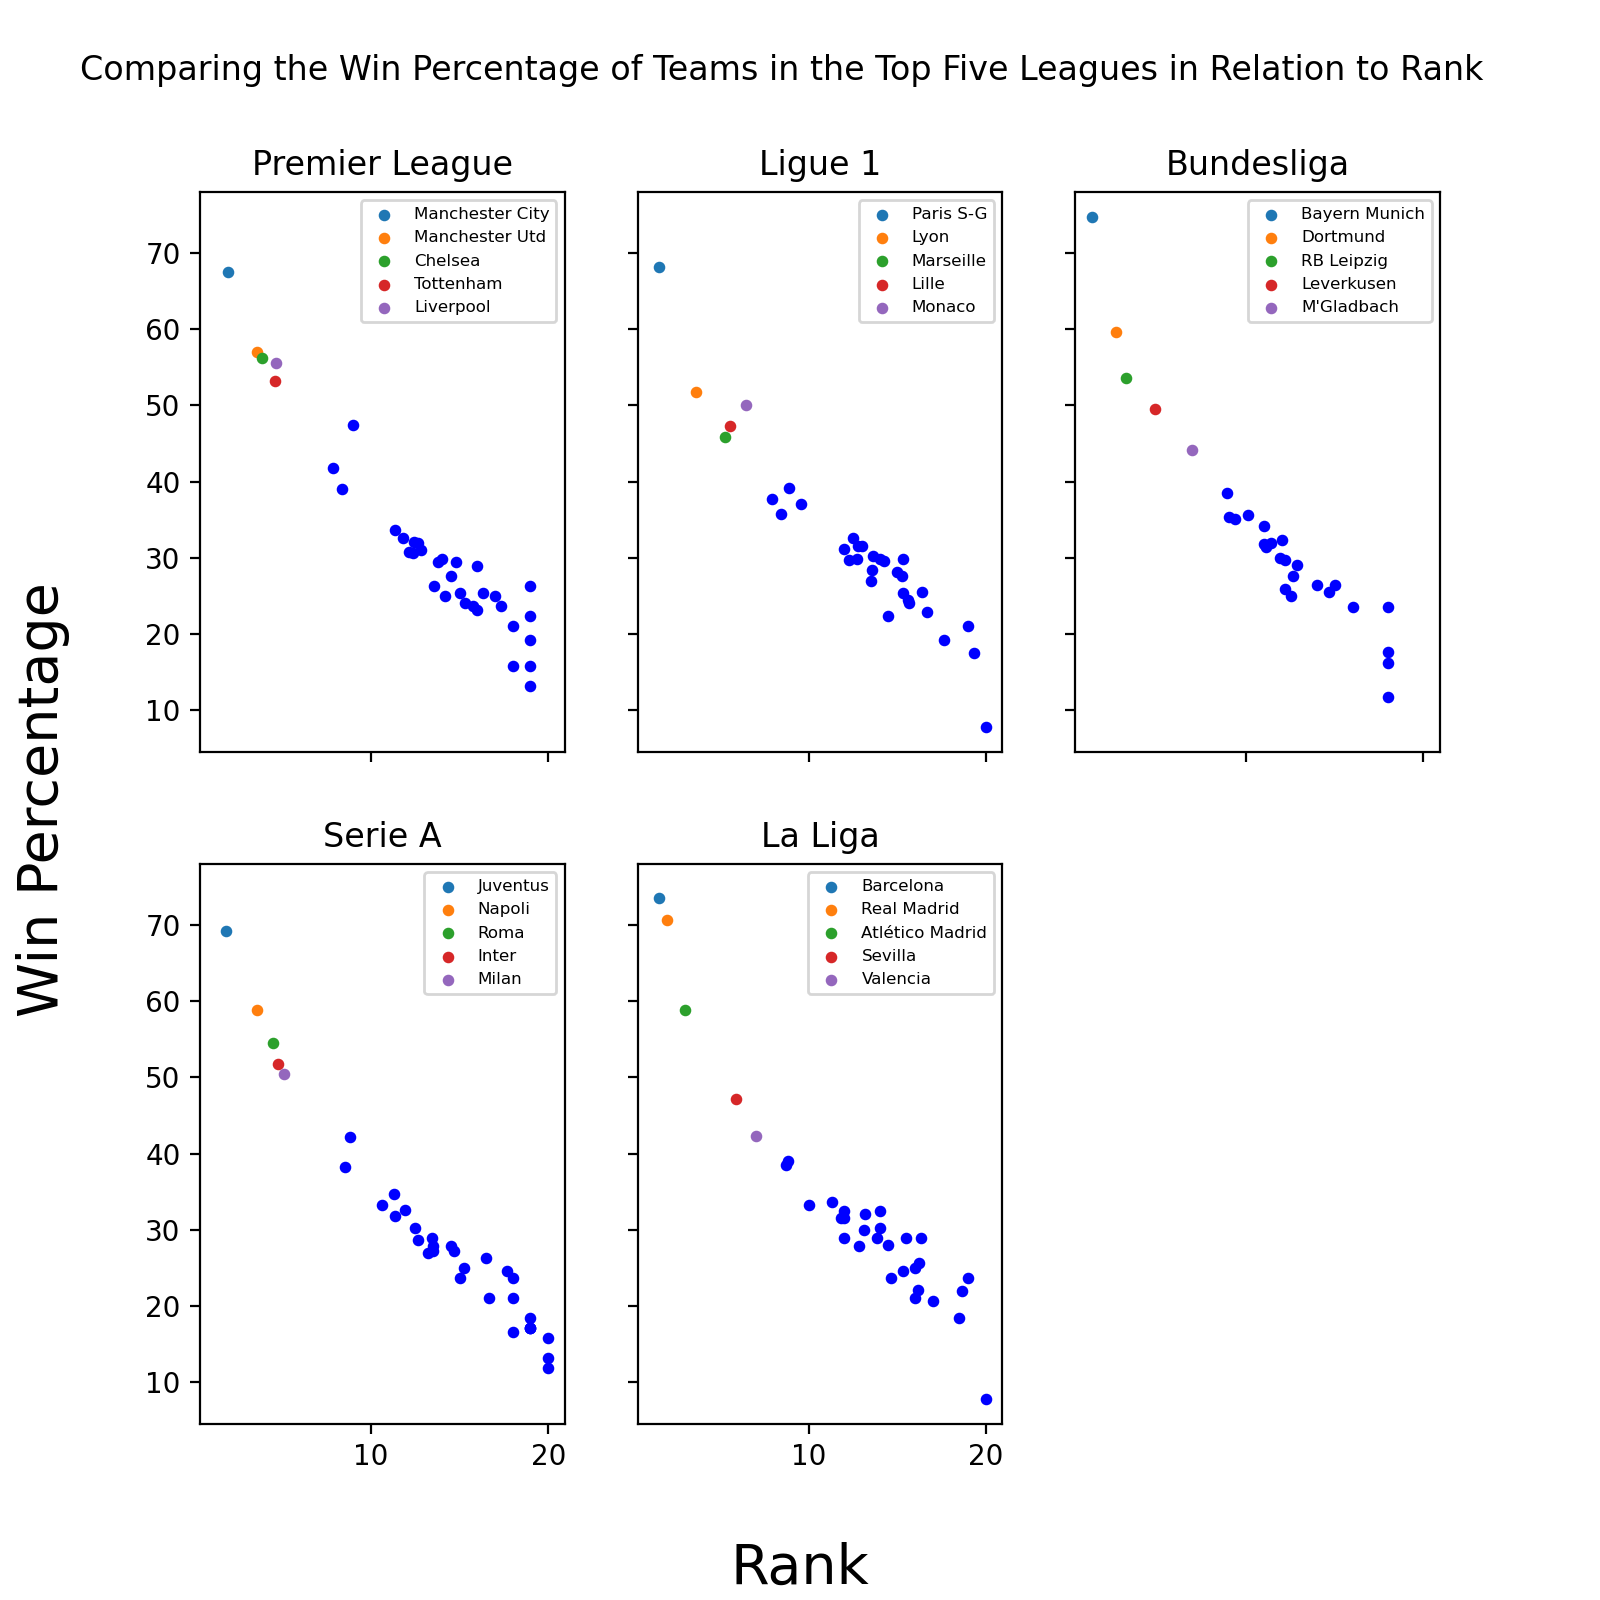

Text(0.01, 0.5, 'Win Percentage')

In [15]:
# Plotting the win_percent of each team in relation to their rank
fig, ((ax1, ax2, ax3),(ax4, ax5, ax6)) = plt.subplots(2, 3, sharex = True, sharey = True, figsize = (8,8))
plt.delaxes(ax6)
axs = [ax1, ax2, ax3, ax4, ax5]

epl_teams = []
ligue_1_teams = []
bundesliga_teams = []
serie_a_teams = []
la_liga_teams = []
all_teams = [epl_teams, ligue_1_teams, bundesliga_teams, serie_a_teams, la_liga_teams]

# Sorting teams by their average rank
sort_rank = []
for i in range(len(leagues)):
    sort_rank.append(leagues[i].sort_values(by = ['rank']))
    
# Create a list of each unique team
for i in range(len(all_teams)):
    all_teams[i] = list(sort_rank[i].index)

# Plotting the graph
for i in range(len(axs)):
    for j in range(len(all_teams[i])):
        if j < 5:
            axs[i].scatter(sort_rank[i]['rank'][j], sort_rank[i]['win_percent'][j], s = 10, cmap = 'twilight_shifted', 
                           label = all_teams[i][j])
        if j > 5:
            axs[i].scatter(sort_rank[i]['rank'][j], sort_rank[i]['win_percent'][j], s = 10, c = 'b', label = '_nolegend_')
    axs[i].set_title(league_names[i])
    axs[i].legend(loc = 'upper right', prop = {'size':6})
    
fig.text(0.05, 0.95, 'Comparing the Win Percentage of Teams in the Top Five Leagues in Relation to Rank', fontsize = 12)
fig.text(0.5, 0.01, 'Rank', ha='center', fontsize = 20)
fig.text(0.01, 0.5, 'Win Percentage', va='center', rotation='vertical', fontsize = 20)

<IPython.core.display.Javascript object>


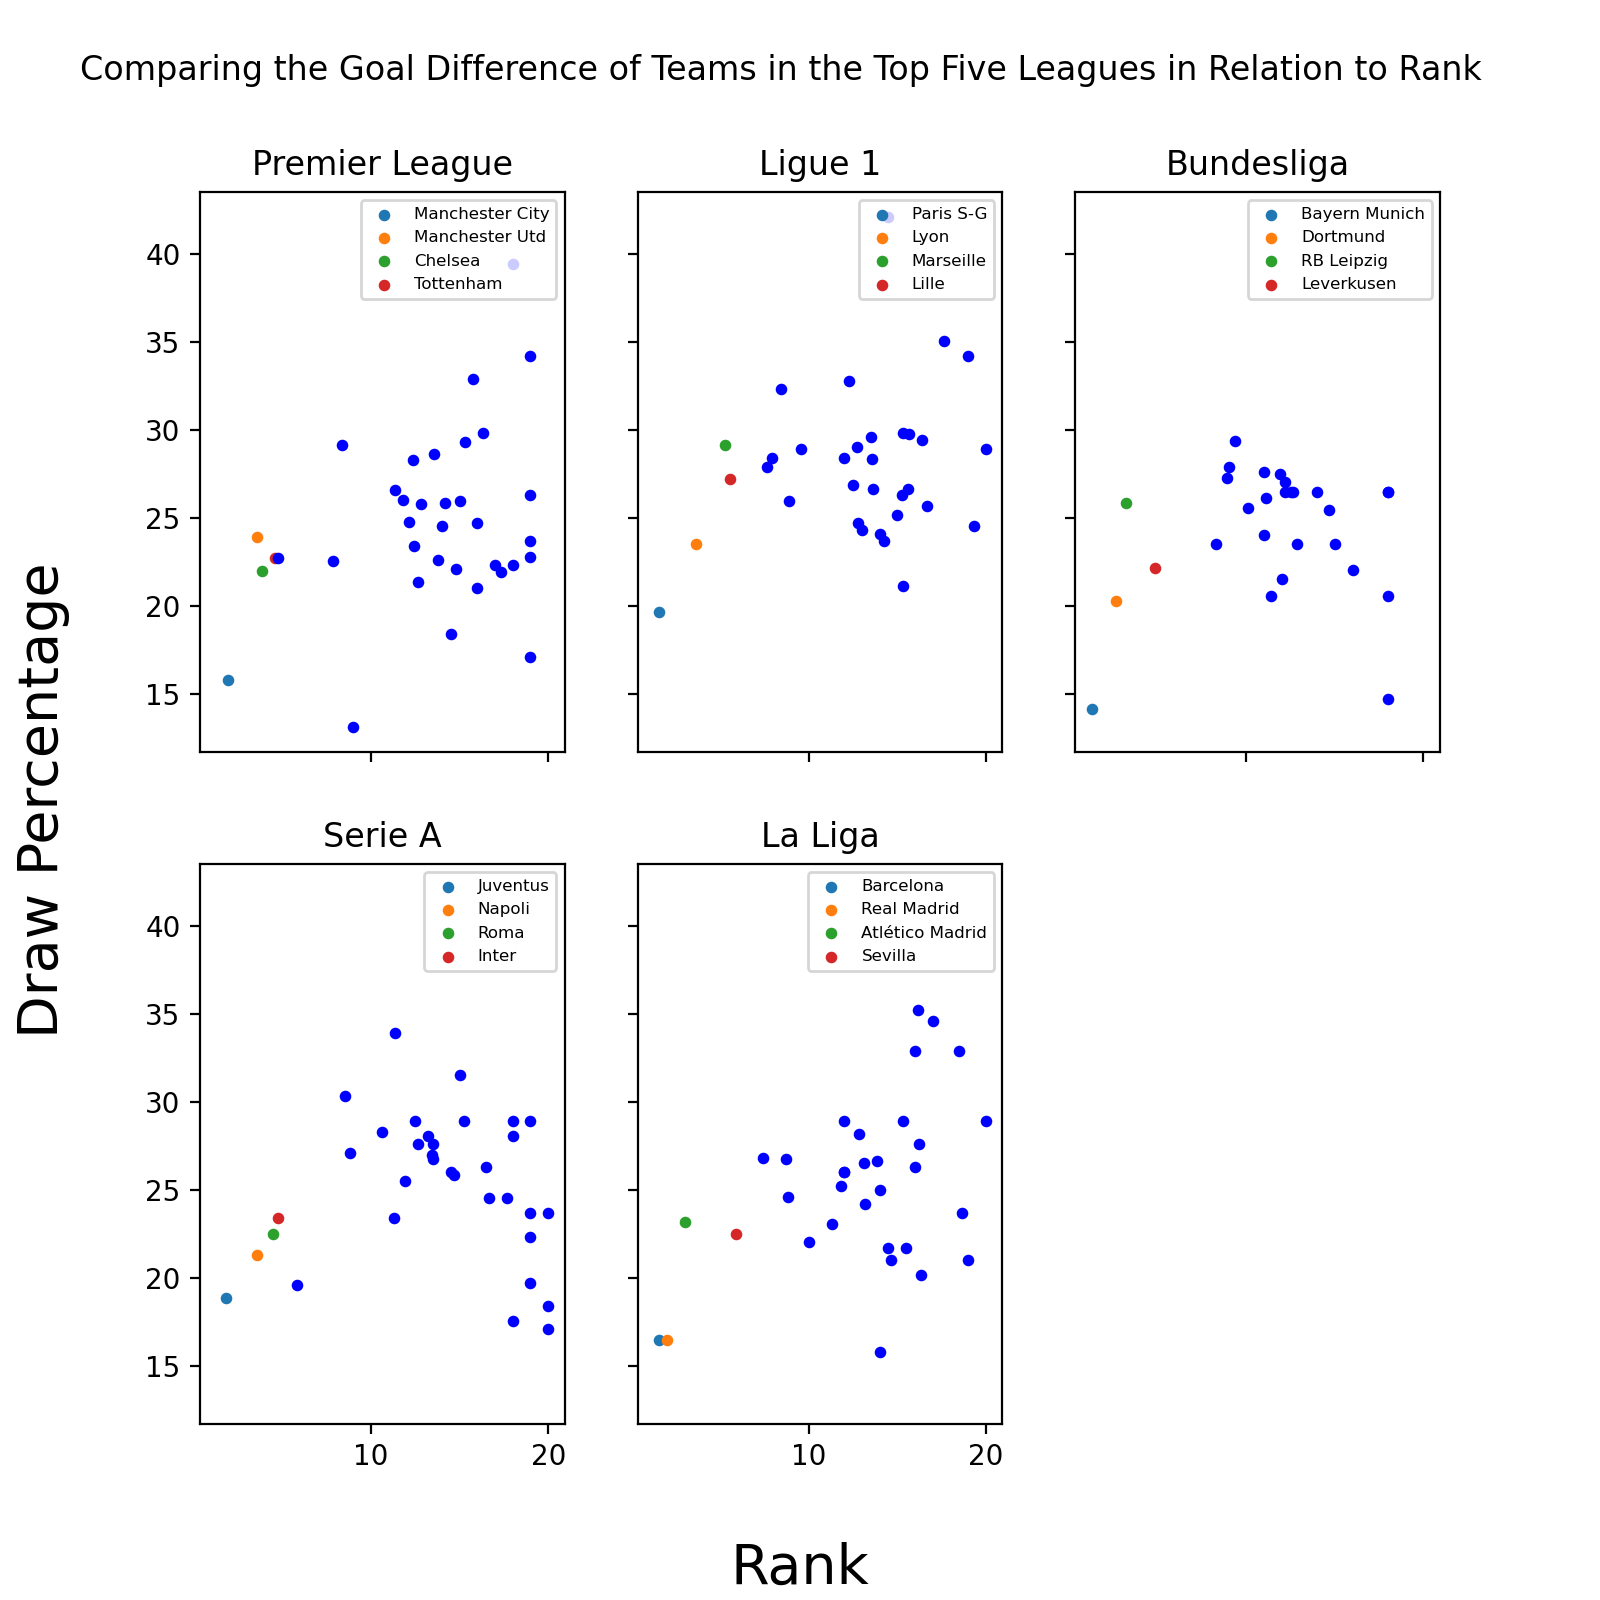

Text(0.01, 0.5, 'Draw Percentage')

In [16]:
# Plotting the win_percent of each team in relation to their rank
fig, ((ax1, ax2, ax3),(ax4, ax5, ax6)) = plt.subplots(2, 3, sharex = True, sharey = True, figsize = (8,8))
plt.delaxes(ax6)
axs = [ax1, ax2, ax3, ax4, ax5]

# Plotting the graph
for i in range(len(axs)):
    for j in range(len(all_teams[i])):
        if j < 4:
            axs[i].scatter(sort_rank[i]['rank'][j], sort_rank[i]['draw_percent'][j], s = 10, cmap = 'twilight_shifted', 
                           label = all_teams[i][j])
        if j > 4:
            axs[i].scatter(sort_rank[i]['rank'][j], sort_rank[i]['draw_percent'][j], s = 10, c = 'b', label = '_nolegend_')
    axs[i].set_title(league_names[i])
    axs[i].legend(loc = 'upper right', prop = {'size':6})
    
fig.text(0.05, 0.95, 'Comparing the Goal Difference of Teams in the Top Five Leagues in Relation to Rank', fontsize = 12)
fig.text(0.5, 0.01, 'Rank', ha='center', fontsize = 20)
fig.text(0.01, 0.5, 'Draw Percentage', va='center', rotation='vertical', fontsize = 20)

<IPython.core.display.Javascript object>


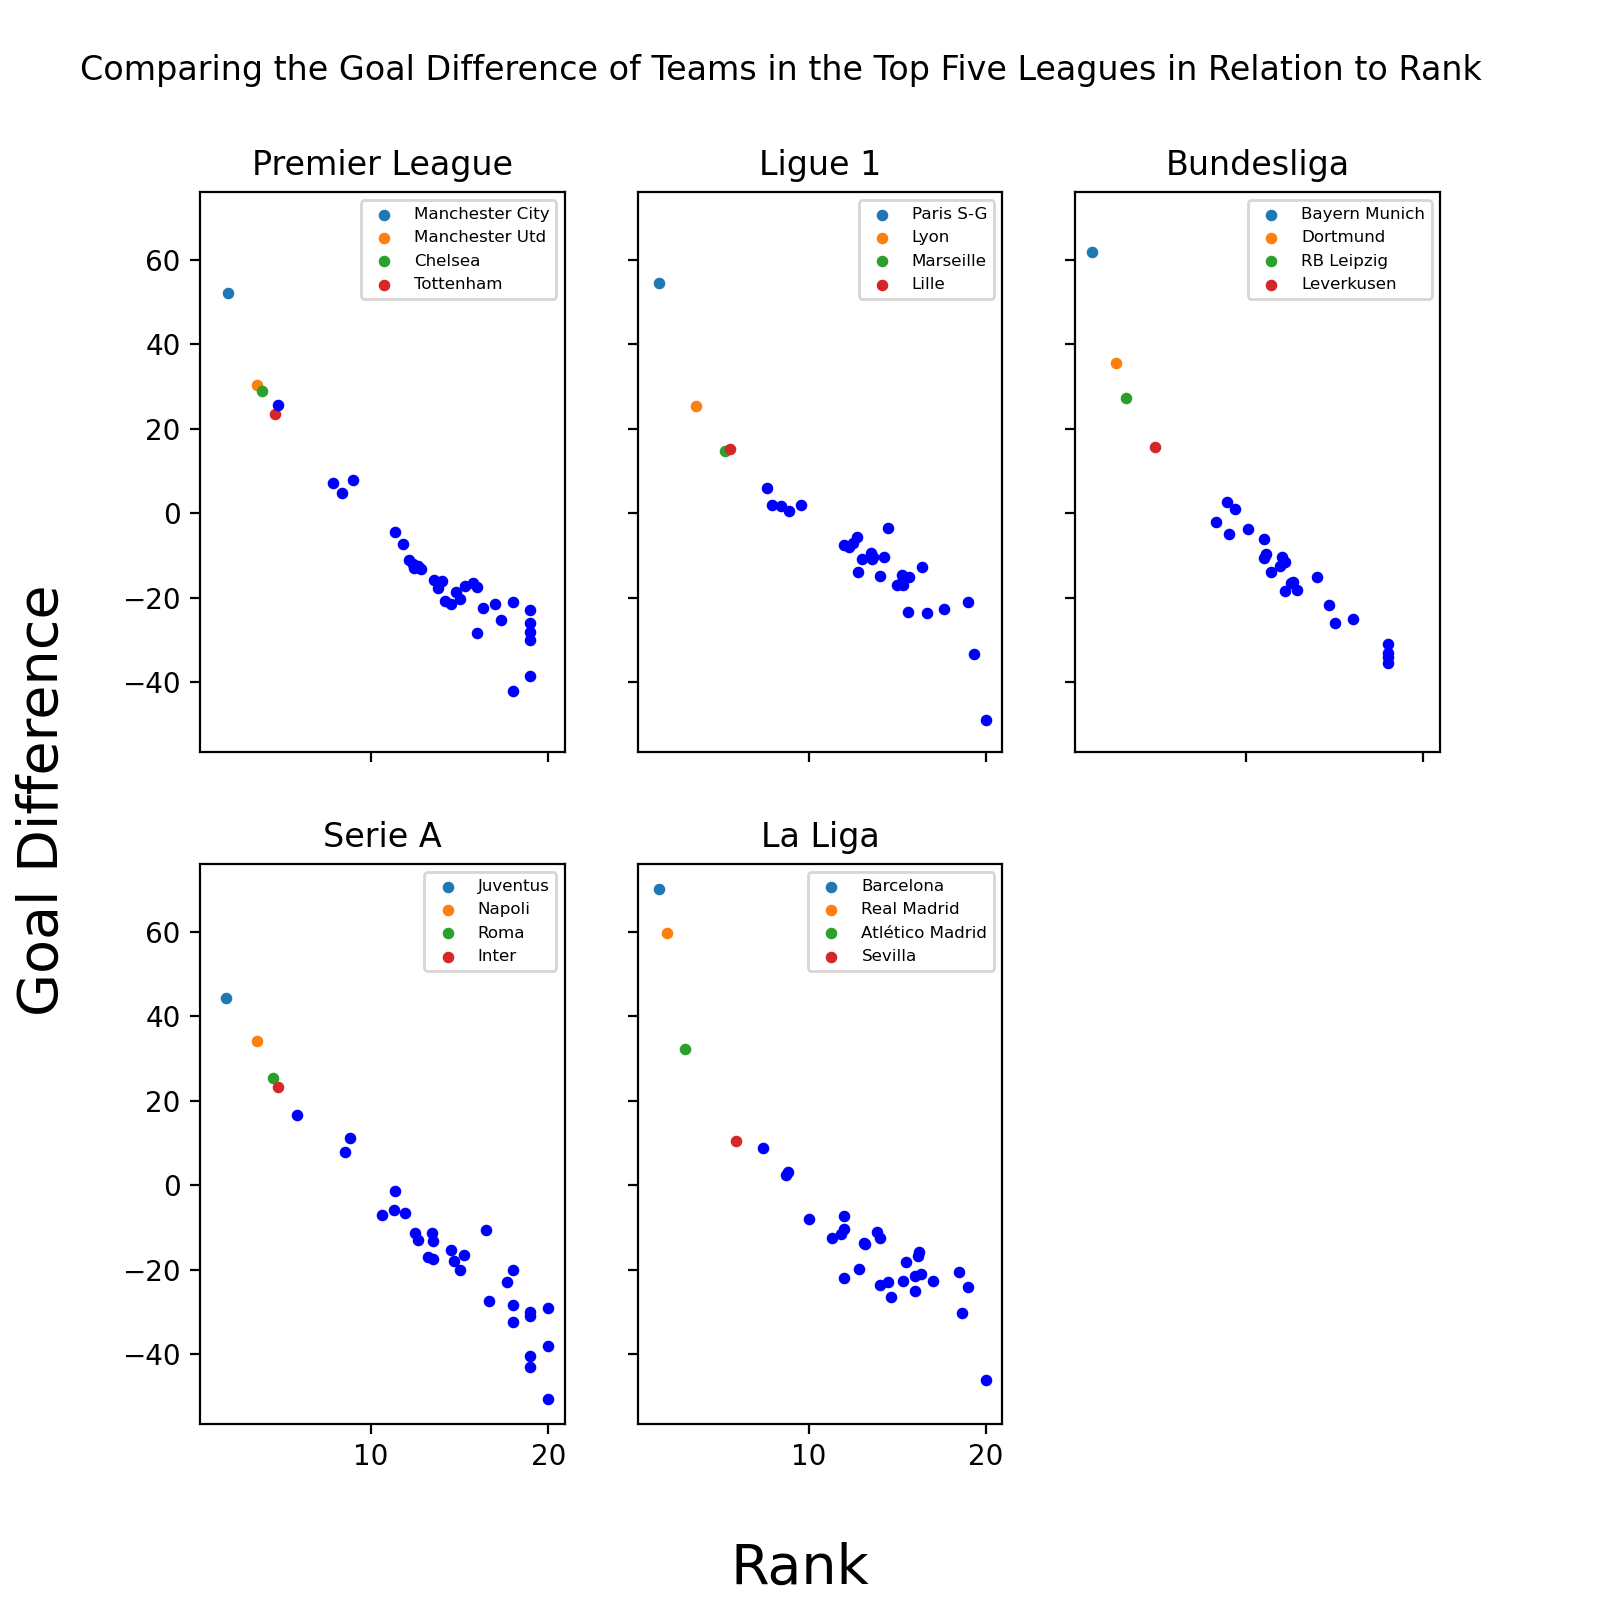

Text(0.01, 0.5, 'Goal Difference')

In [17]:
# Plotting the goal_diff of each team in relation to their rank
fig, ((ax1, ax2, ax3),(ax4, ax5, ax6)) = plt.subplots(2, 3, sharex = True, sharey = True, figsize = (8,8))
plt.delaxes(ax6)
axs = [ax1, ax2, ax3, ax4, ax5]

# Plotting the graph
for i in range(len(axs)):
    for j in range(len(all_teams[i])):
        if j < 4:
            axs[i].scatter(sort_rank[i]['rank'][j], sort_rank[i]['goal_diff'][j], s = 10, cmap = 'twilight_shifted', 
                           label = all_teams[i][j])
        if j > 4:
            axs[i].scatter(sort_rank[i]['rank'][j], sort_rank[i]['goal_diff'][j], s = 10, c = 'b', label = '_nolegend_')
    axs[i].set_title(league_names[i])
    axs[i].legend(loc = 'upper right', prop = {'size':6})
    
fig.text(0.05, 0.95, 'Comparing the Goal Difference of Teams in the Top Five Leagues in Relation to Rank', fontsize = 12)
fig.text(0.5, 0.01, 'Rank', ha='center', fontsize = 20)
fig.text(0.01, 0.5, 'Goal Difference', va='center', rotation='vertical', fontsize = 20)

<IPython.core.display.Javascript object>


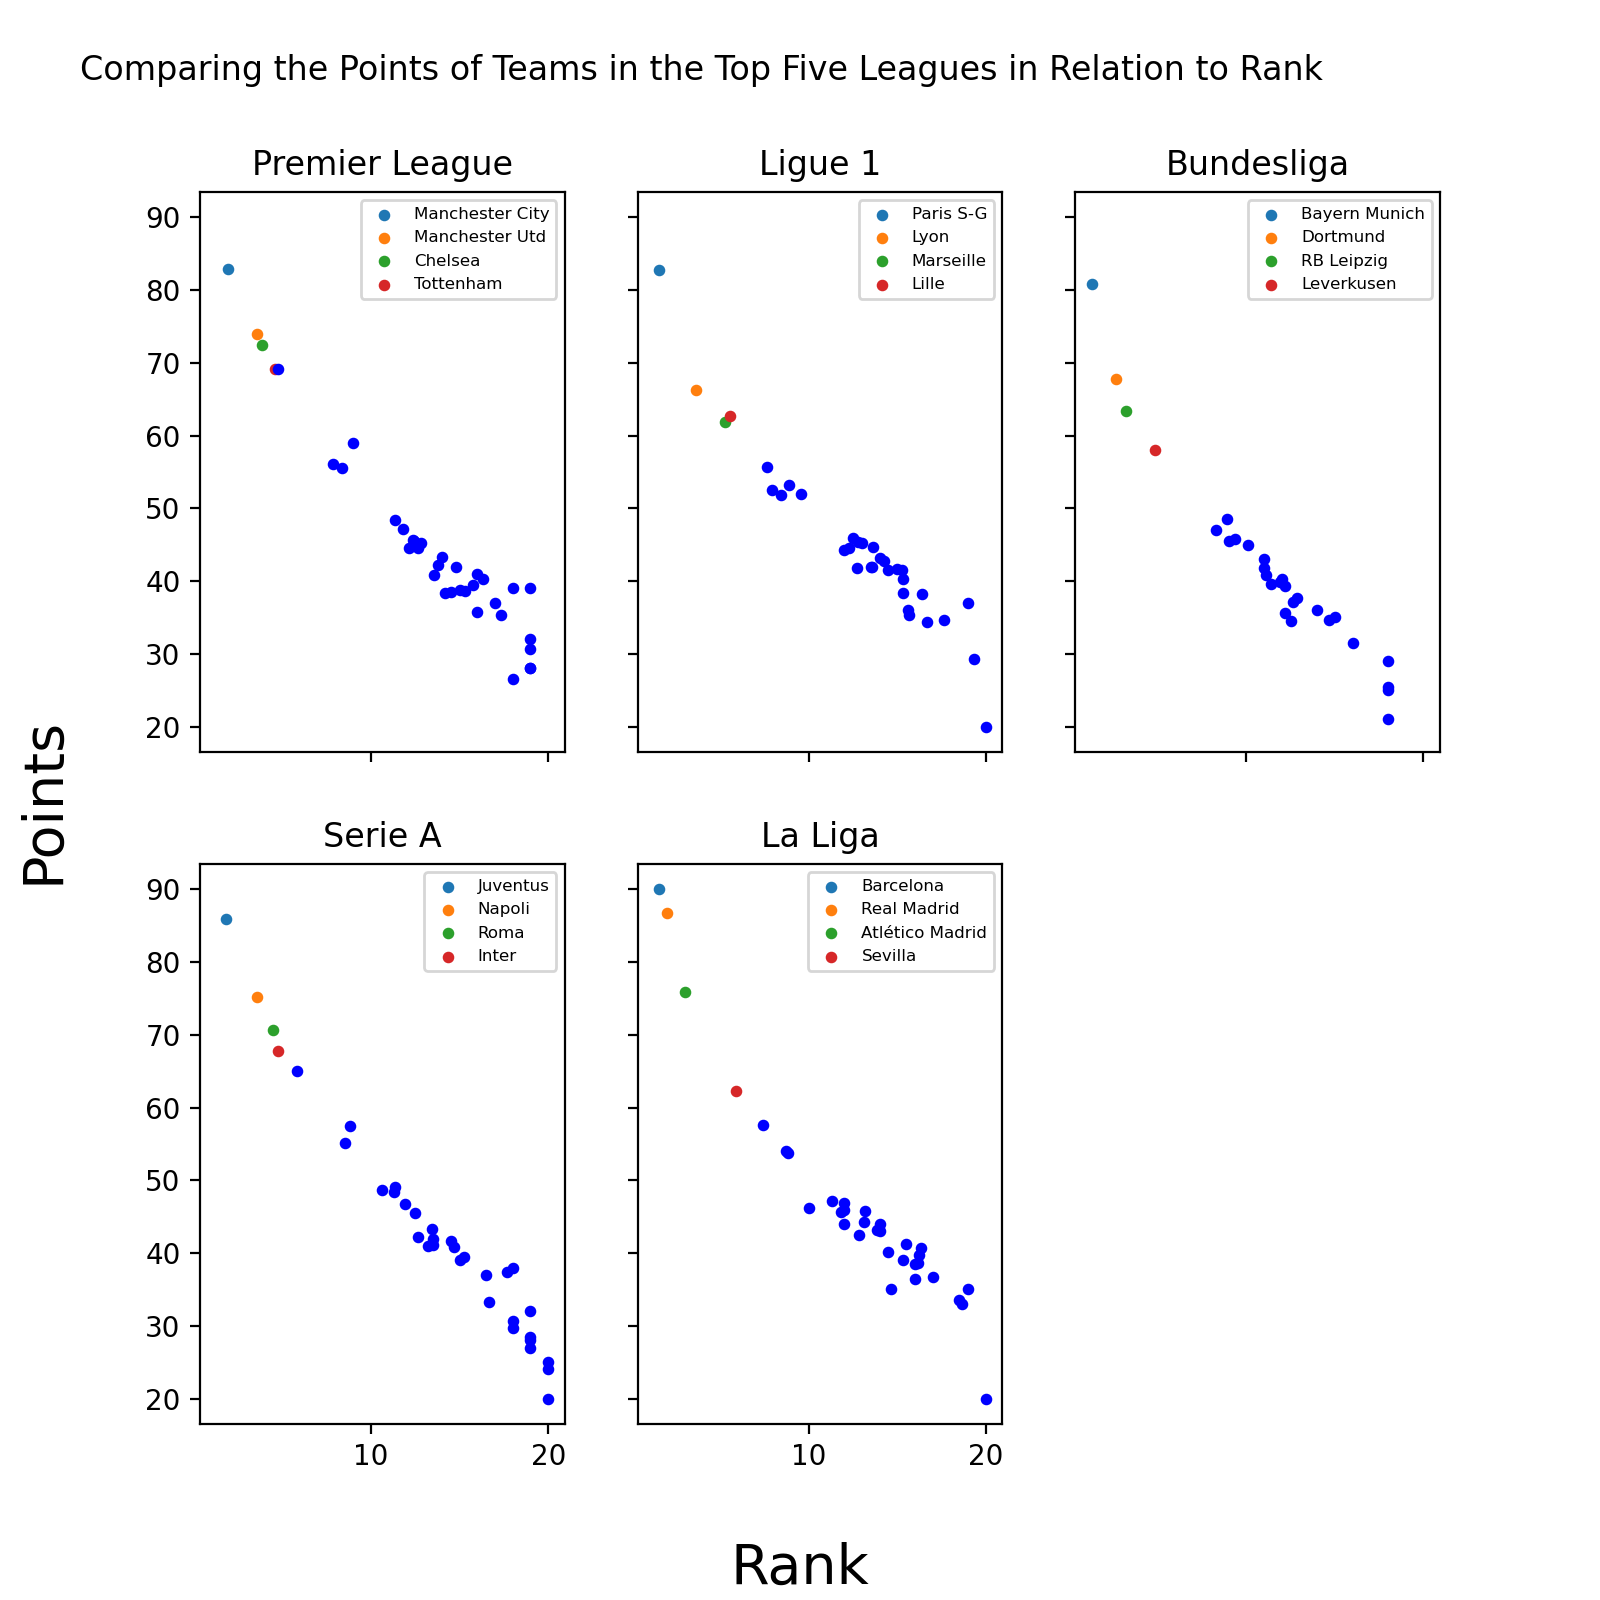

Text(0.01, 0.5, 'Points')

In [18]:
# Plotting the points of each team in relation to their rank
fig, ((ax1, ax2, ax3),(ax4, ax5, ax6)) = plt.subplots(2, 3, sharex = True, sharey = True, figsize = (8,8))
plt.delaxes(ax6)
axs = [ax1, ax2, ax3, ax4, ax5]

# Plotting the graph
for i in range(len(axs)):
    for j in range(len(all_teams[i])):
        if j < 4:
            axs[i].scatter(sort_rank[i]['rank'][j], sort_rank[i]['points'][j], s = 10, cmap = 'twilight_shifted', 
                           label = all_teams[i][j])
        if j > 4:
            axs[i].scatter(sort_rank[i]['rank'][j], sort_rank[i]['points'][j], s = 10, c = 'b', label = '_nolegend_')
    axs[i].set_title(league_names[i])
    axs[i].legend(loc = 'upper right', prop = {'size':6})
    
fig.text(0.05, 0.95, 'Comparing the Points of Teams in the Top Five Leagues in Relation to Rank', fontsize = 12)
fig.text(0.5, 0.01, 'Rank', ha='center', fontsize = 20)
fig.text(0.01, 0.5, 'Points', va='center', rotation='vertical', fontsize = 20)

<IPython.core.display.Javascript object>


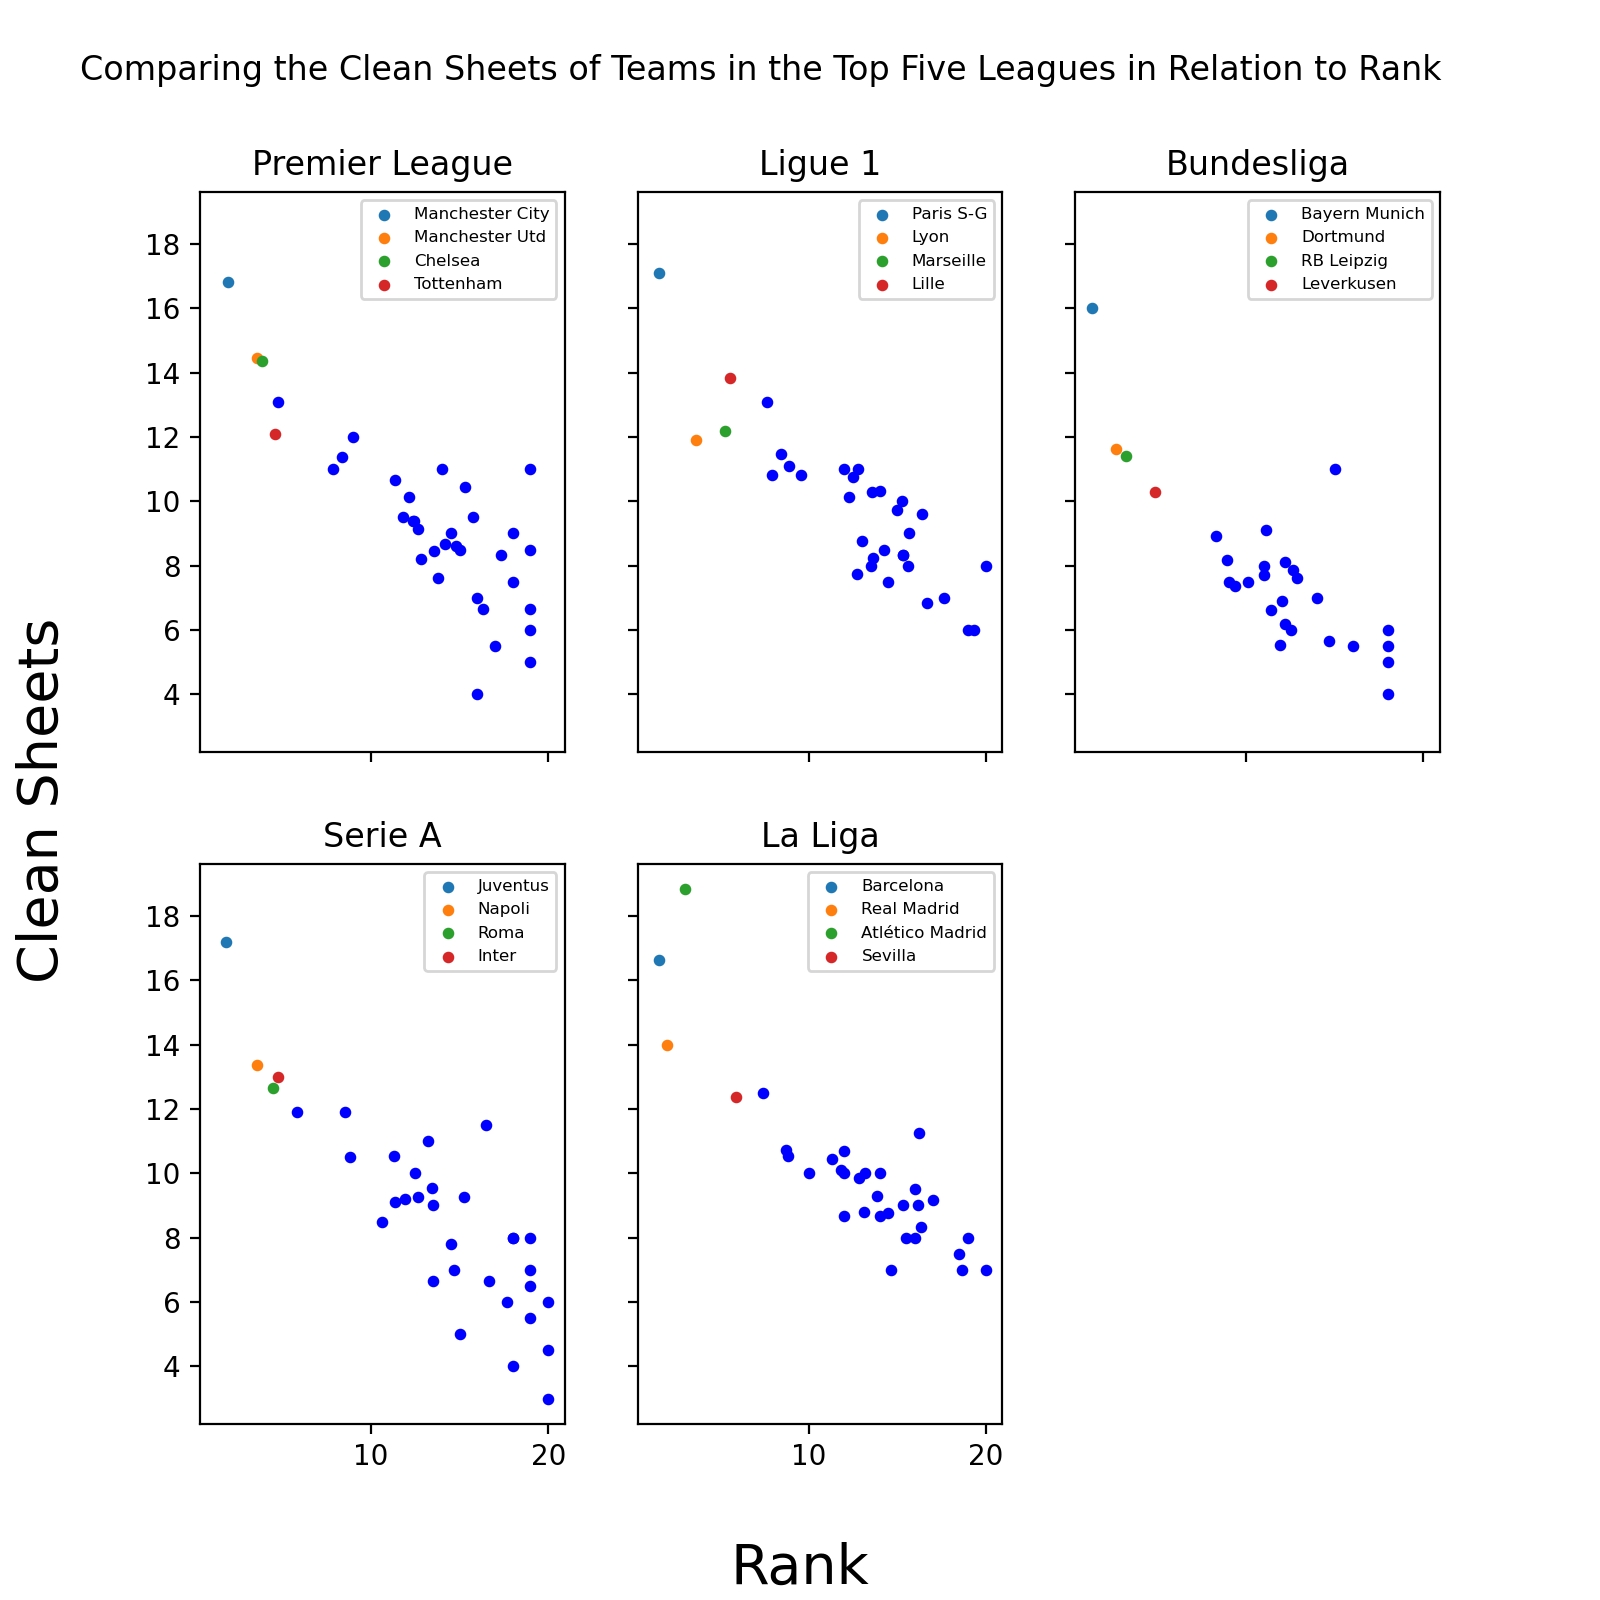

Text(0.01, 0.5, 'Clean Sheets')

In [19]:
# Plotting the clean sheets against of each team in relation to their rank
fig, ((ax1, ax2, ax3),(ax4, ax5, ax6)) = plt.subplots(2, 3, sharex = True, sharey = True, figsize = (8,8))
plt.delaxes(ax6)
axs = [ax1, ax2, ax3, ax4, ax5]

# Plotting the graph
for i in range(len(axs)):
    for j in range(len(all_teams[i])):
        if j < 4:
            axs[i].scatter(sort_rank[i]['rank'][j], sort_rank[i]['clean_sheets'][j], s = 10, cmap = 'twilight_shifted', 
                           label = all_teams[i][j])
        if j > 4:
            axs[i].scatter(sort_rank[i]['rank'][j], sort_rank[i]['clean_sheets'][j], s = 10, c = 'b', label = '_nolegend_')
    axs[i].set_title(league_names[i])
    axs[i].legend(loc = 'upper right', prop = {'size':6})
    
fig.text(0.05, 0.95, 'Comparing the Clean Sheets of Teams in the Top Five Leagues in Relation to Rank', fontsize = 12)
fig.text(0.5, 0.01, 'Rank', ha='center', fontsize = 20)
fig.text(0.01, 0.5, 'Clean Sheets', va='center', rotation='vertical', fontsize = 20)

<IPython.core.display.Javascript object>


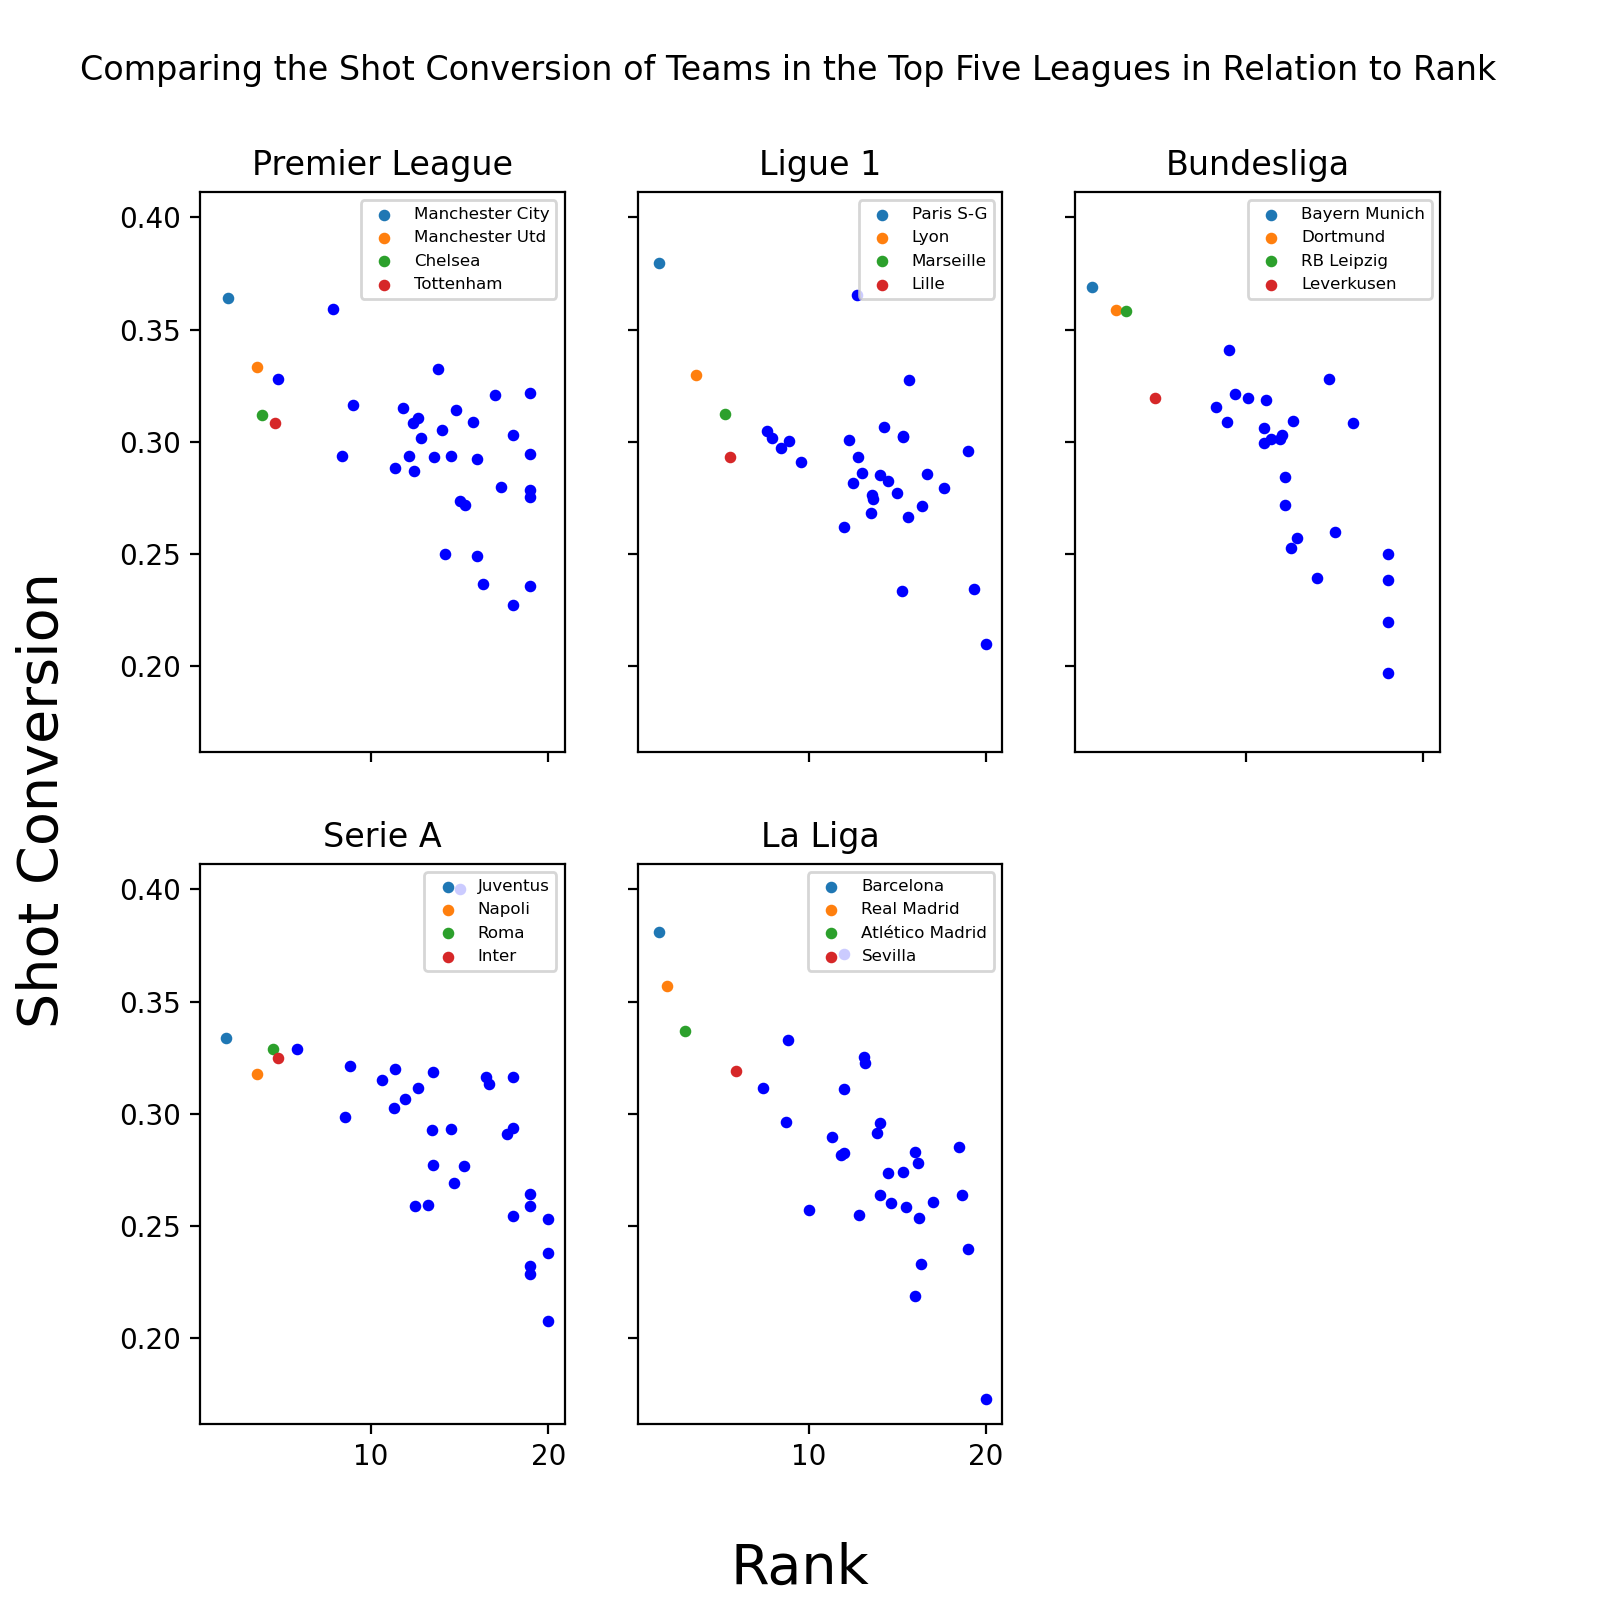

Text(0.01, 0.5, 'Shot Conversion')

In [20]:
# Plotting the shot conversion of each team in relation to their rank
fig, ((ax1, ax2, ax3),(ax4, ax5, ax6)) = plt.subplots(2, 3, sharex = True, sharey = True, figsize = (8,8))
plt.delaxes(ax6)
axs = [ax1, ax2, ax3, ax4, ax5]

# Plotting the graph
for i in range(len(axs)):
    for j in range(len(all_teams[i])):
        if j < 4:
            axs[i].scatter(sort_rank[i]['rank'][j], sort_rank[i]['shot_conversion'][j], s = 10, cmap = 'twilight_shifted', 
                           label = all_teams[i][j])
        if j > 4:
            axs[i].scatter(sort_rank[i]['rank'][j], sort_rank[i]['shot_conversion'][j], s = 10, c = 'b', label = '_nolegend_')
    axs[i].set_title(league_names[i])
    axs[i].legend(loc = 'upper right', prop = {'size':6})
    
fig.text(0.05, 0.95, 'Comparing the Shot Conversion of Teams in the Top Five Leagues in Relation to Rank', fontsize = 12)
fig.text(0.5, 0.01, 'Rank', ha='center', fontsize = 20)
fig.text(0.01, 0.5, 'Shot Conversion', va='center', rotation='vertical', fontsize = 20)

<IPython.core.display.Javascript object>


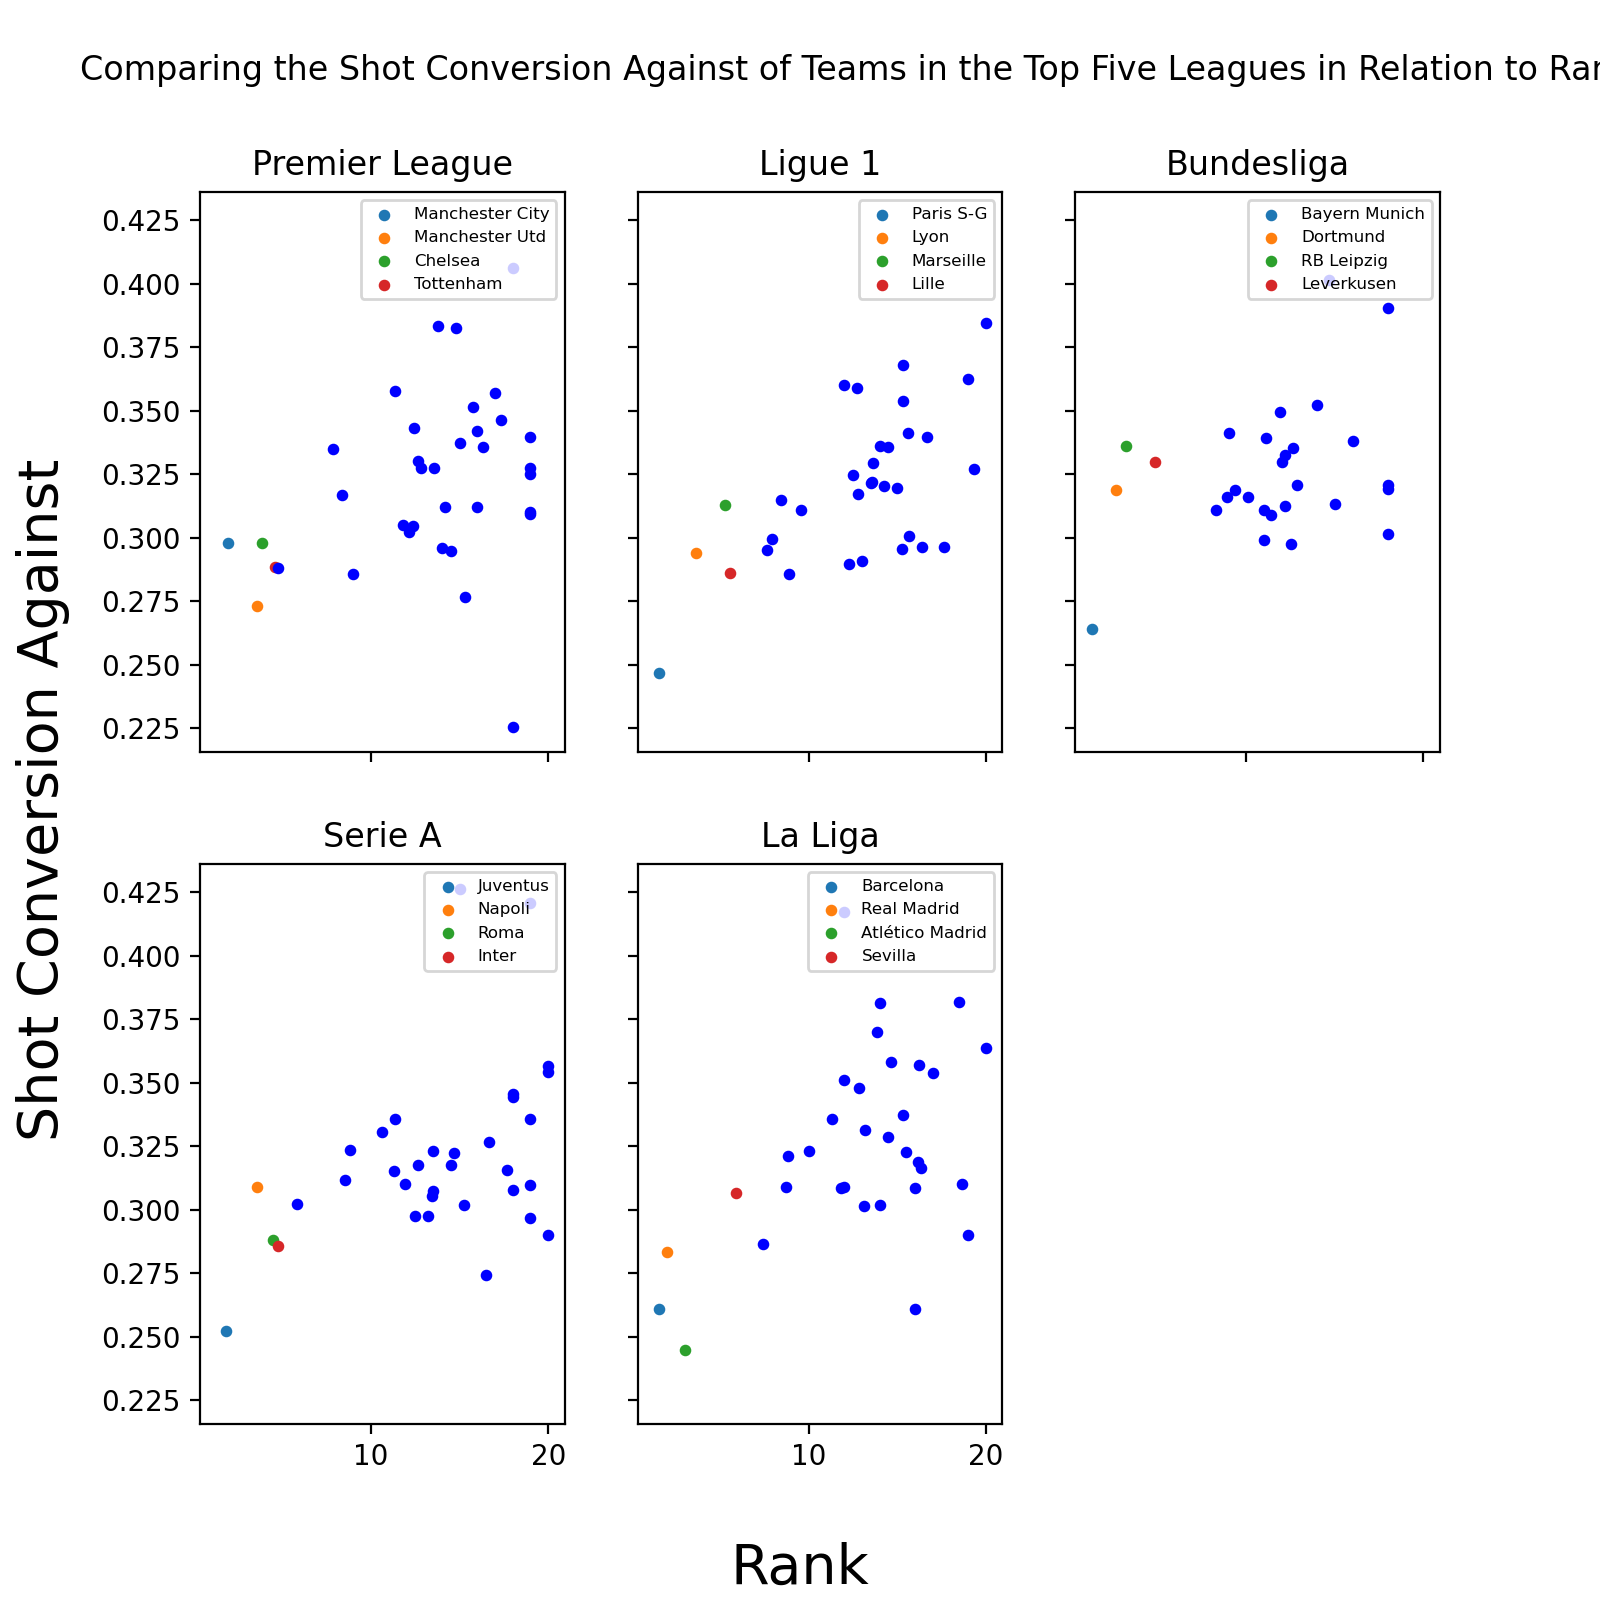

Text(0.01, 0.5, 'Shot Conversion Against')

In [21]:
# Plotting the shot conversion against of each team in relation to their rank
fig, ((ax1, ax2, ax3),(ax4, ax5, ax6)) = plt.subplots(2, 3, sharex = True, sharey = True, figsize = (8,8))
plt.delaxes(ax6)
axs = [ax1, ax2, ax3, ax4, ax5]

# Plotting the graph
for i in range(len(axs)):
    for j in range(len(all_teams[i])):
        if j < 4:
            axs[i].scatter(sort_rank[i]['rank'][j], sort_rank[i]['shot_conversion_against'][j], s = 10, cmap = 'twilight_shifted', 
                           label = all_teams[i][j])
        if j > 4:
            axs[i].scatter(sort_rank[i]['rank'][j], sort_rank[i]['shot_conversion_against'][j], s = 10, c = 'b', label = '_nolegend_')
    axs[i].set_title(league_names[i])
    axs[i].legend(loc = 'upper right', prop = {'size':6})
    
fig.text(0.05, 0.95, 'Comparing the Shot Conversion Against of Teams in the Top Five Leagues in Relation to Rank', fontsize = 12)
fig.text(0.5, 0.01, 'Rank', ha='center', fontsize = 20)
fig.text(0.01, 0.5, 'Shot Conversion Against', va='center', rotation='vertical', fontsize = 20)

<IPython.core.display.Javascript object>


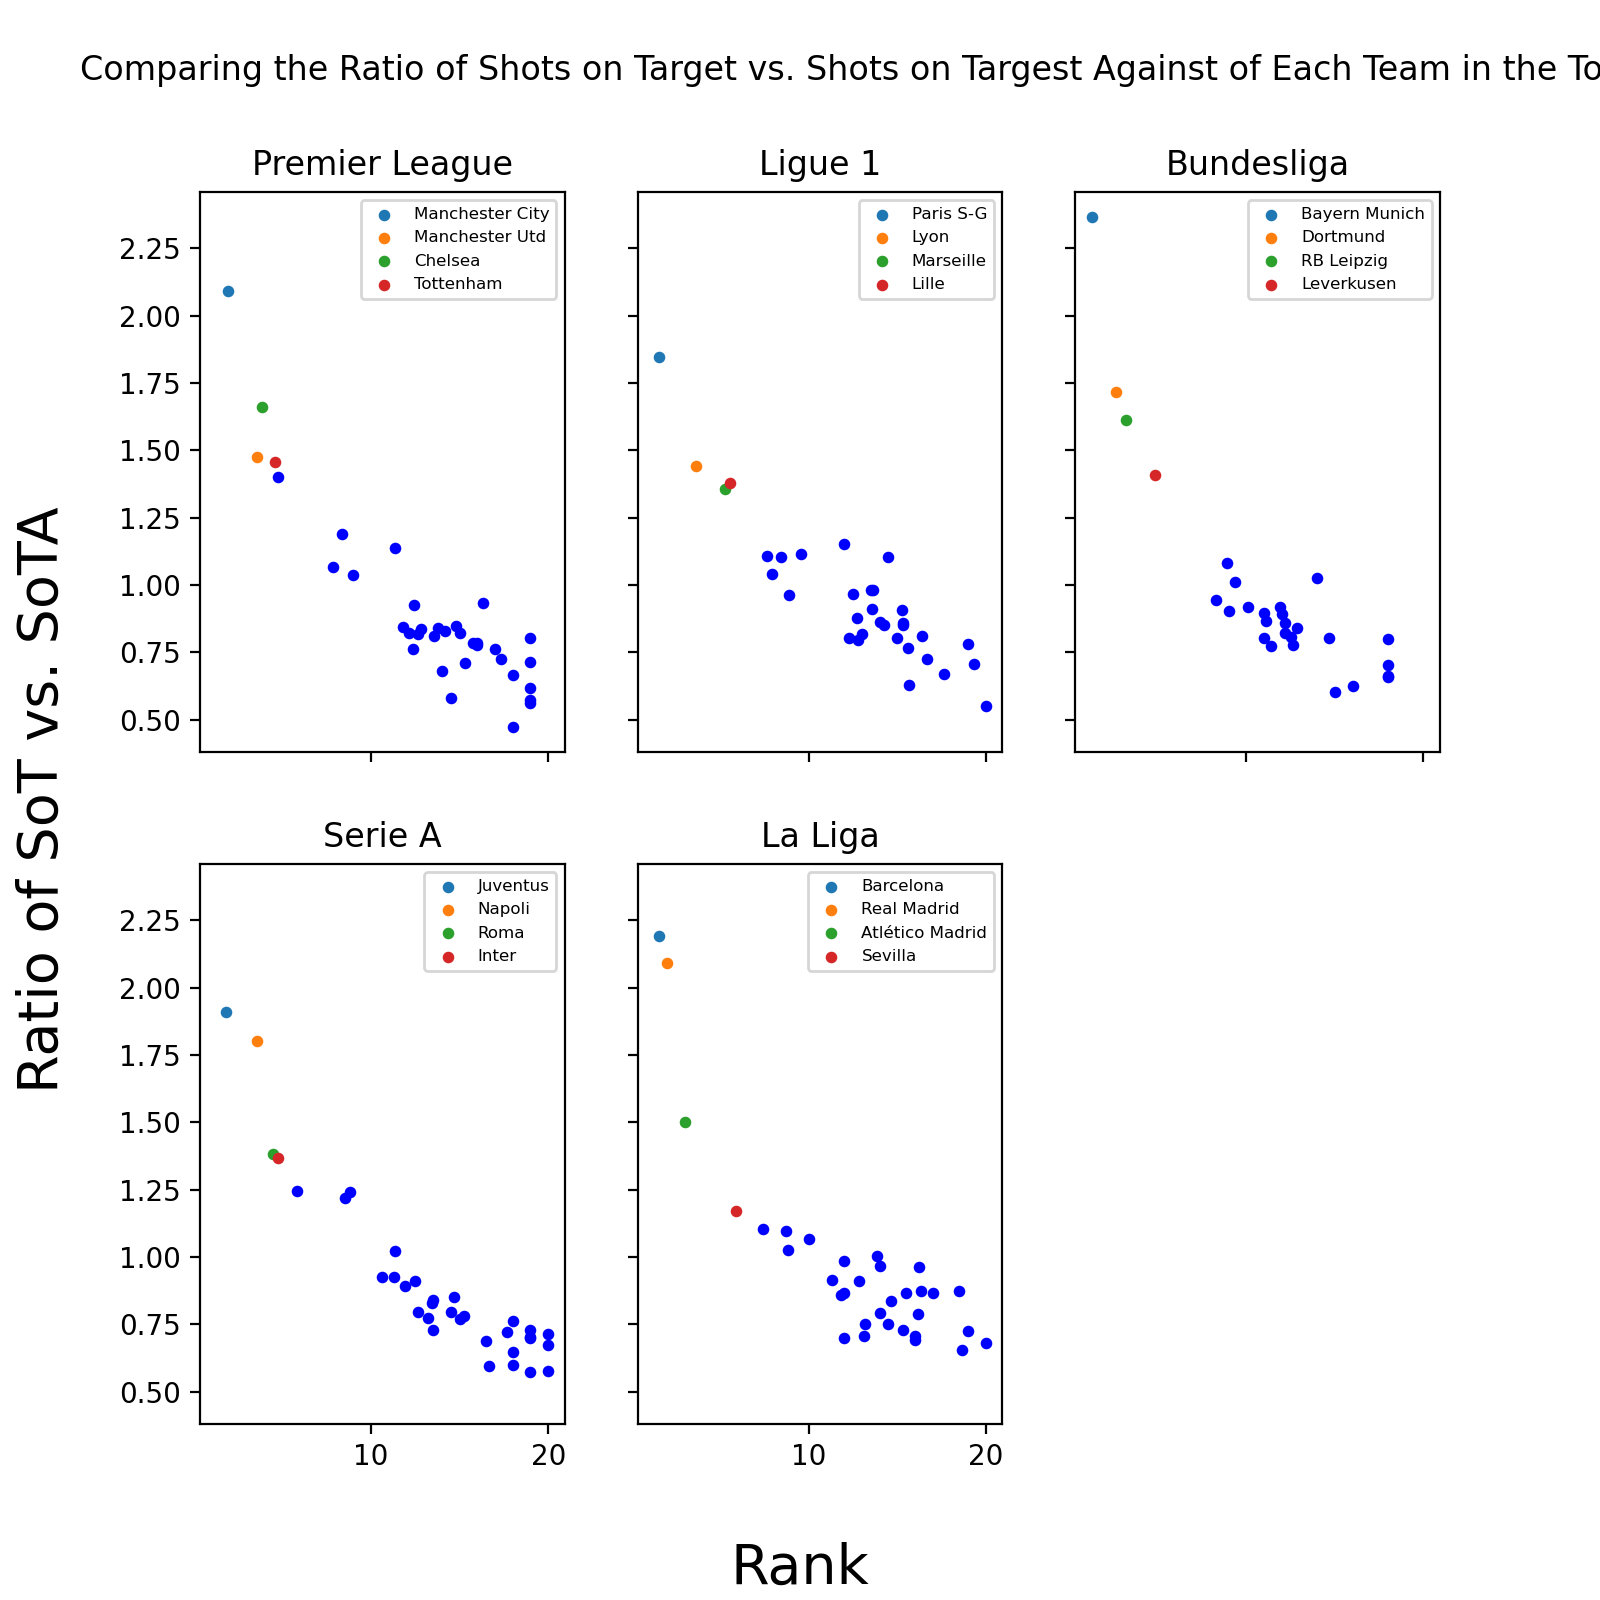

Text(0.01, 0.5, 'Ratio of SoT vs. SoTA')

In [22]:
# Plotting the ratio of shots on targets vs. shots on target against of each team in relation to their rank
fig, ((ax1, ax2, ax3),(ax4, ax5, ax6)) = plt.subplots(2, 3, sharex = True, sharey = True, figsize = (8,8))
plt.delaxes(ax6)
axs = [ax1, ax2, ax3, ax4, ax5]

# Plotting the graph
for i in range(len(axs)):
    for j in range(len(all_teams[i])):
        if j < 4:
            axs[i].scatter(sort_rank[i]['rank'][j], sort_rank[i]['SoT/SoTA'][j], s = 10, cmap = 'twilight_shifted', 
                           label = all_teams[i][j])
        if j > 4:
            axs[i].scatter(sort_rank[i]['rank'][j], sort_rank[i]['SoT/SoTA'][j], s = 10, c = 'b', label = '_nolegend_')
    axs[i].set_title(league_names[i])
    axs[i].legend(loc = 'upper right', prop = {'size':6})
    
fig.text(0.05, 0.95, 'Comparing the Ratio of Shots on Target vs. Shots on Targest Against of Each Team in the Top Five Leagues in Relation to Rank', fontsize = 12)
fig.text(0.5, 0.01, 'Rank', ha='center', fontsize = 20)
fig.text(0.01, 0.5, 'Ratio of SoT vs. SoTA', va='center', rotation='vertical', fontsize = 20)